In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [10]:
tickers = ["APA", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

In [11]:
data.cov() * 250

,APA,^GSPC
APA,1.297493e+05,-2.855520e+06
^GSPC,-2.855520e+06,8.440273e+07


In [12]:
data.corr()

,APA,^GSPC
APA,1.000000,-0.862888
^GSPC,-0.862888,1.000000


In [29]:
simple_returns = (data/data.shift(1)) -1

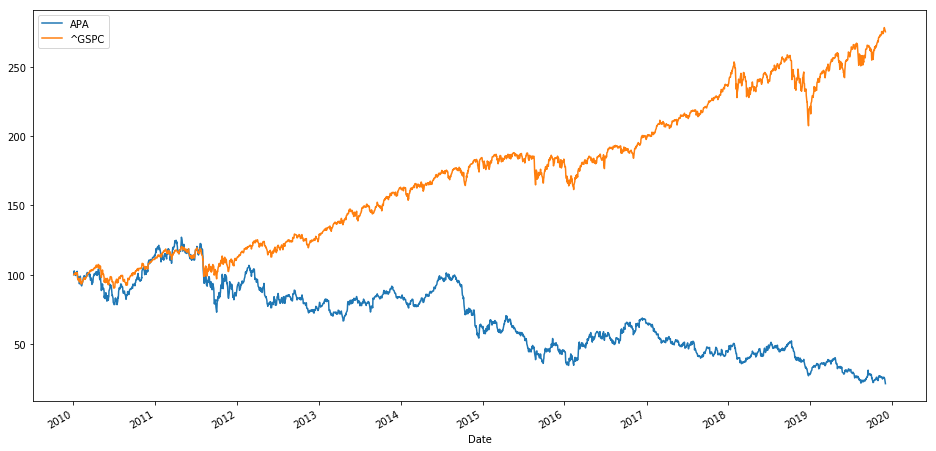

In [16]:
(data/data.iloc[0] * 100).plot(figsize = (16,8))
plt.show()

In [17]:
securties_count = len(tickers)

In [30]:
#lets calculate the portfolio expected return and standard deviation if er have 1000 portfolios containing
#the teo securties

port_expected_returns = []
port_std = []

for x in range(1000):
    weights = np.random.random(securties_count)
    weights /= np.sum(weights)
    port_expected_returns.append(np.sum(weights * simple_returns.mean()) * 250)
    port_std.append(np.sqrt(np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))))
    
port_ER_array = np.array(port_expected_returns)
port_std_array = np.array(port_std)

In [31]:
portfolio = pd.DataFrame({"Volatility": port_std_array, "Return": port_ER_array})

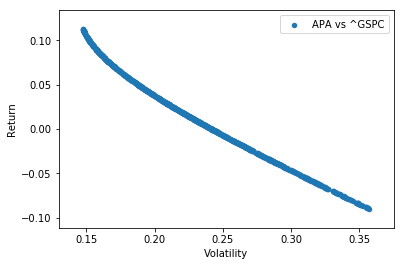

In [32]:
portfolio.plot(x = "Volatility", y = "Return", kind = "scatter", label = "APA vs ^GSPC")